# Regresión Lineal

### ¿Qué es la predicción de datos?
Algoritmos que se definen como "clasificadores" que identifican a qué conjunto de categorías pertenecen los datos.

**Sobreajuste y subajuste:**

*Nuestro modelo lo "obligamos" a ajustarse a los datos de entrada y salida.*

> **Sobreajuste:** El modelo fallará porque no tiene estrictamente los valores de las muestras de entrenamiento.
> 
> **Subajuste:** El modelo fallará en el reconocimiento por falta de muestras suficientes. No generaliza el conocimiento.

### Regresión Lineal Simple

Algoritmo de aprendizaje supervisado que nos indica ña tendencia de un conjunto de datos continuos, modelando la relación entre una variable dependiente Y y una explicativa llamada X.


### Regresión Lineal Multiple

Si nuestro problema tiene más de dos variables se le considera lineal múltiple.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
dataset = pd.read_csv("salarios.csv")
dataset.head()

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [5]:
dataset.shape

(30, 2)

In [7]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

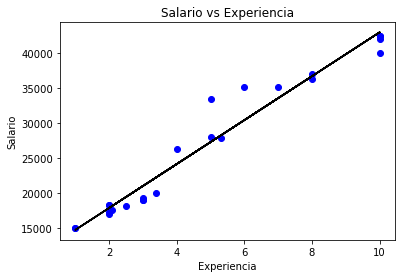

In [10]:
viz_train = plt
viz_train.scatter(X_train, Y_train, color = 'blue')
viz_train.plot(X_train, regressor.predict(X_train), color = 'black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show()

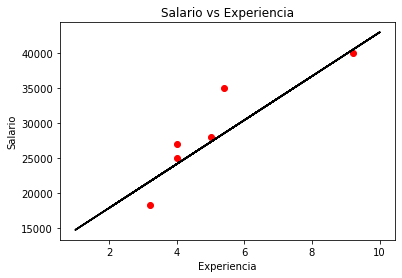

In [11]:
viz_train = plt
viz_train.scatter(X_test, Y_test, color = 'red')
viz_train.plot(X_train, regressor.predict(X_train), color = 'black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show()

In [12]:
regressor.score(X_test, Y_test)

0.7862437374732997

## Reto:

Agregar una columna de países al dataset e implementar **Regresión Lineal Multiple**.

In [14]:
import random
import numpy as np

In [15]:
paises = ['CO', 'MX', 'AR', 'CL', 'UR']
dataset['pais'] = [paises[np.random.randint(0, len(paises))] for i in range(len(dataset))]

In [18]:
dataset['paisID'] = pd.factorize(dataset['pais'])[0]

In [20]:
dataset.head()

,Aexperiencia,Salario,pais,paisID
0,10.0,42500,MX,0
1,8.0,36302,UR,1
2,5.4,35000,CL,2
3,2.5,18103,MX,0
4,1.0,15000,CO,3


In [21]:
x = dataset[['Aexperiencia', 'paisID']]
y = dataset['Salario']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [24]:
regressor.score(X_test, Y_test)

0.7869435073487766

<bound method Figure.show of <Figure size 900x600 with 1 Axes>>

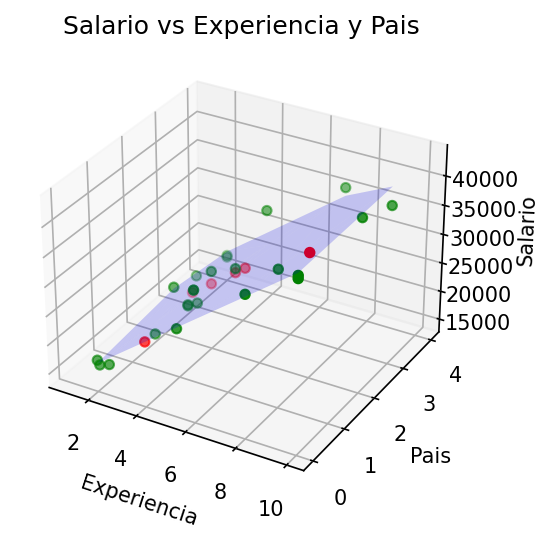

In [28]:
fig = plt.figure(dpi = 150)
viz_train = fig.add_subplot(111, projection = '3d')
viz_train.scatter(X_train['Aexperiencia'], X_train['paisID'], Y_train, color = 'green', label='Train')
viz_train.scatter(X_test['Aexperiencia'], X_test['paisID'], regressor.predict(X_test), color = 'red', label='Test')
viz_train.plot_trisurf(X_train['Aexperiencia'], X_train['paisID'], regressor.predict(X_train), color = 'blue', alpha = 0.2)
viz_train.set_title('Salario vs Experiencia y Pais')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('Pais')
viz_train.set_zlabel('Salario')
fig.show